C:\Users\zwang10\AppData\Local\Continuum\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:/Users/zwang10/Documents/Project_1/fma-master\utils.py:212: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


(2573,)
len(list test_y): 2572
len(array y): 2572
['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
Size of the dataframe: (2572, 130561)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2572 samples in 33.500s...
[t-SNE] Computed neighbors for 2572 samples in 2006.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2572
[t-SNE] Computed conditional probabilities for sample 2000 / 2572
[t-SNE] Computed conditional probabilities for sample 2572 / 2572
[t-SNE] Mean sigma: 809.018580
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.888618
[t-SNE] Error after 1000 iterations: 2.085609
(2572, 2)
t-SNE done! Time elapsed: 2161.417982339859 seconds


C:\Users\zwang10\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


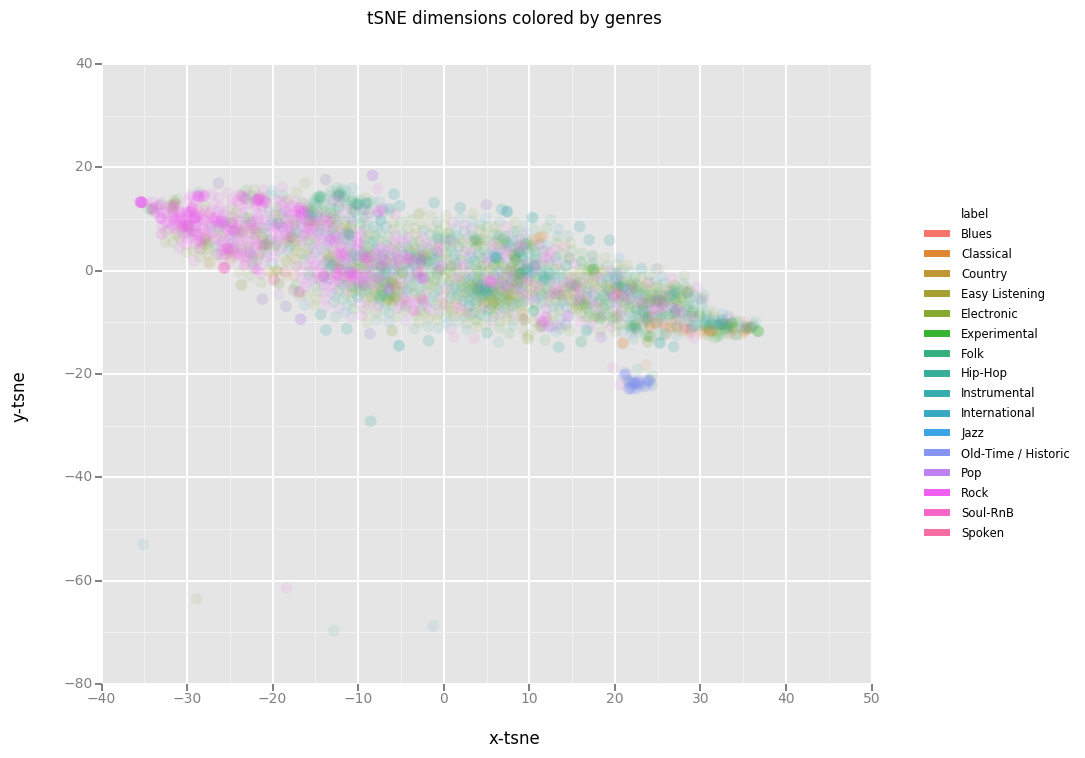

<ggplot: (-9223372036736179284)>


In [1]:
# t-SNE

%matplotlib inline
import numpy as np

X = np.load('C:/DT/fma_medium/x_test.npy').reshape([2572,-1])

import sys
sys.path.append('C:/Users/zwang10/Documents/Project_1/fma-master')
import utils
PATH_CSV = 'C:/Users/zwang10/Documents/Project_1/fma_metadata'
tracks = utils.load(PATH_CSV+'/tracks.csv')

medium = tracks['set', 'subset'] <= 'medium'
test = tracks['set', 'split'] == 'test'
test = tracks.loc[medium & test, ('track', 'genre_top')]
print(test.shape)

count = 0
count_error = 0
list_test = []
test_y = []

for j,i in enumerate(test.index):
    if j == 104:
        continue
    else:
        test_y.append(test[i])
print('len(list test_y):',len(test_y))
y = np.array(test_y)
print('len(array y):',len(y))
print(y)

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,learning_rate = 200.0)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)
print(tsne_results.shape)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

from ggplot import *

df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

p = ggplot( df, aes(x='x-tsne', y='y-tsne', color='label')) + geom_point(size=70,alpha=0.1) + ggtitle("tSNE dimensions colored by genres")
print(p)